<a href="https://colab.research.google.com/github/Blutronics/BakeryAssociationRule/blob/Toan/bakery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Bakery.csv')
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [ ]:
dfti=df[['TransactionNo','Items']]
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [ ]:
dfti.TransactionNo.groupby(dfti.Items)

In [ ]:
#dfti=pd.get_dummies(dfti,drop_first=True)
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [ ]:
items=[]
for i in dfti.groupby('TransactionNo')['Items'].apply(list):
    items.append(i)
#items

In [ ]:
all_items=[i for item in items for i in item]
#all_items


In [ ]:
from collections import Counter

In [ ]:
item_frequencies=Counter(all_items)
#item_frequencies

In [ ]:
item_frequencies=sorted(item_frequencies.items(),key=lambda x:x[1])
#item_frequencies

In [ ]:
itemfreqs=list(reversed([i[1] for i in item_frequencies]))
item=list(reversed([i[0] for i in item_frequencies]))
itemfreqs[0:12]

[5471, 3325, 1435, 1025, 856, 771, 616, 590, 540, 379, 374, 370]

In [ ]:
import matplotlib.pyplot as plt

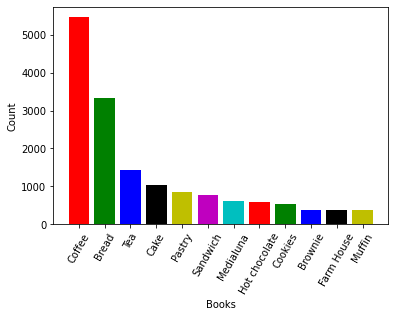

In [ ]:
plt.bar(height = itemfreqs[0:12], x = list(range(0, 12)), color = list('rgbkymc'))
plt.xticks(list(range(0, 12), ), item[0:12],rotation=60)
plt.xlabel("Books")
plt.ylabel("Count")
plt.show()

In [ ]:
dfti

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
...,...,...
20502,9682,Coffee
20503,9682,Tea
20504,9683,Coffee
20505,9683,Pastry


In [ ]:
df

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend
...,...,...,...,...,...
20502,9682,Coffee,2017-09-04 14:32:58,Afternoon,Weekend
20503,9682,Tea,2017-09-04 14:32:58,Afternoon,Weekend
20504,9683,Coffee,2017-09-04 14:57:06,Afternoon,Weekend
20505,9683,Pastry,2017-09-04 14:57:06,Afternoon,Weekend


In [ ]:
df.Items.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

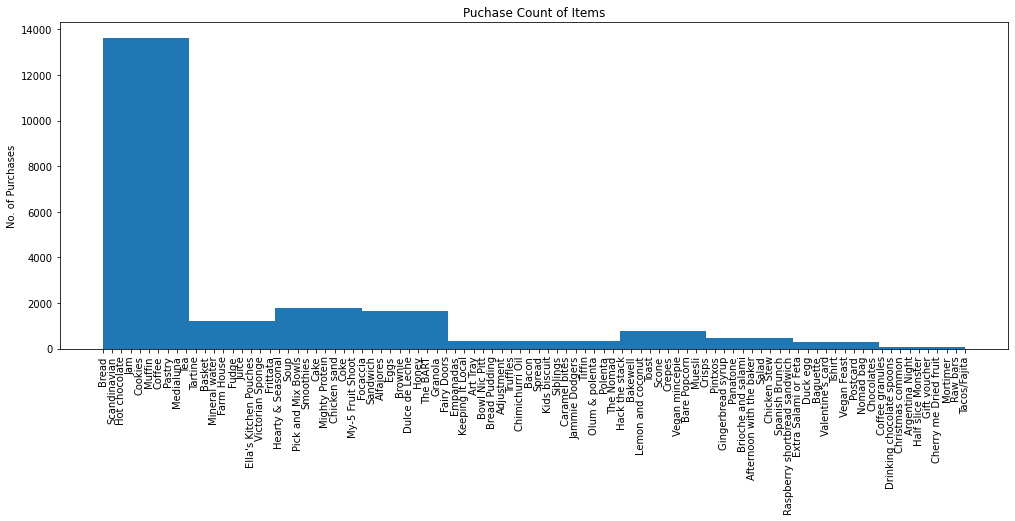

In [ ]:
plt.figure(figsize = (17, 6))
plt.hist(df.Items)

plt.ylabel("No. of Purchases")
plt.title('Puchase Count of Items')
plt.xticks(rotation = 90)

plt.show()

In [ ]:
df.DayType.value_counts()

Weekday    12807
Weekend     7700
Name: DayType, dtype: int64

In [ ]:
print(7700 + 12807)
print(7700/20507)
print(12807/20507)

20507
0.3754815428877944
0.6245184571122055


[]

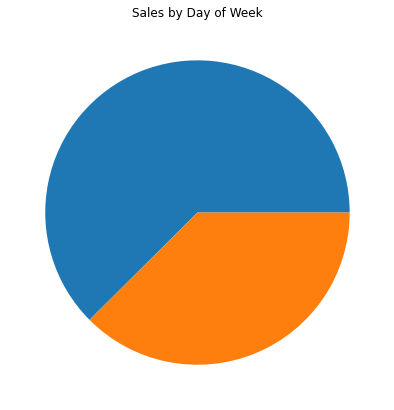

In [ ]:
fig = plt.figure(figsize = (10, 7))
plt.pie(df.DayType.value_counts())
plt.title('Sales by Day of Week')
plt.plot()

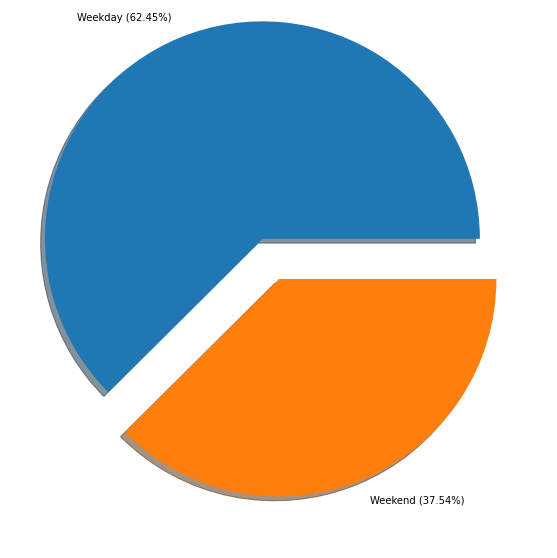

In [ ]:
fig = plt.figure(figsize = (10, 10))

y = np.array([62.45, 37.54])
mylabels = ["Weekday (62.45%)", "Weekend (37.54%)"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

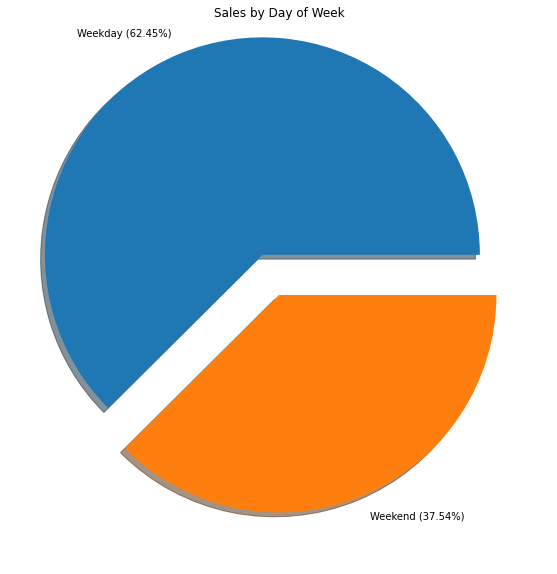

In [ ]:
fig = plt.figure(figsize = (10, 10))

y = np.array([62.45, 37.54])
mylabels = ["Weekday (62.45%)", "Weekend (37.54%)"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.title('Sales by Day of Week')
plt.show()

In [ ]:
print(7700 + 12807)
print((7700/20507)/2)
print((12807/20507)/5)

20507
0.1877407714438972
0.12490369142244111


In [ ]:
print(0.1877407714+0.12490369)

0.3126444614


In [ ]:
print(0.18774077/0.31264446)
print(0.1249036914/0.3126444614)

0.6004928729586316
0.39950712973033337


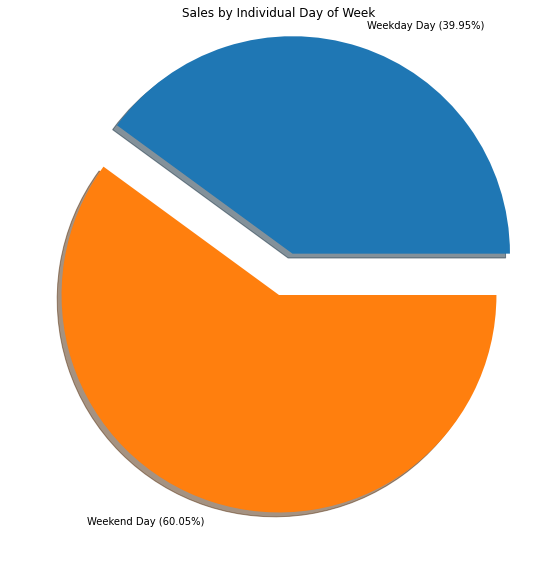

In [ ]:
fig = plt.figure(figsize = (10, 10))

y = np.array([39.95, 60.05])
mylabels = ["Weekday Day (39.95%)", "Weekend Day (60.05%)"]
myexplode = [0.2, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.title('Sales by Individual Day of Week')
plt.show()

In [ ]:
df.Daypart.value_counts()

Afternoon    11569
Morning       8404
Evening        520
Night           14
Name: Daypart, dtype: int64

Text(0.5, 1.0, 'Sales by Time of Day')

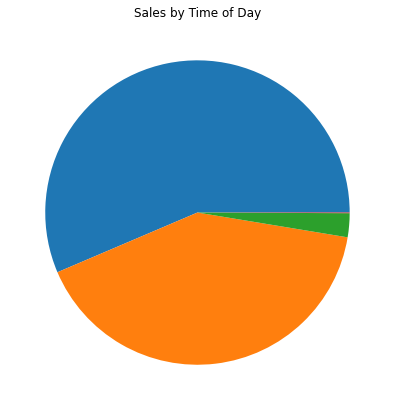

In [ ]:

fig = plt.figure(figsize = (10, 7))
plt.pie(df.Daypart.value_counts())
plt.plot()
plt.title('Sales by Time of Day')

In [ ]:
11569 + 8404 + 520 + 14

20507

In [ ]:
print(11569 + 8404 + 520 + 14)
print('Afternoon Proportion =', 11569/20507)
print('Morning Proportion =', 8404/20507)
print('Evening Proportion =', 520/20507)
print('Night Proportion =', 14/20507)

20507
Afternoon Proportion = 0.5641488272297265
Morning Proportion = 0.4098112839518213
Evening Proportion = 0.025357195104110792
Night Proportion = 0.0006826937143414443


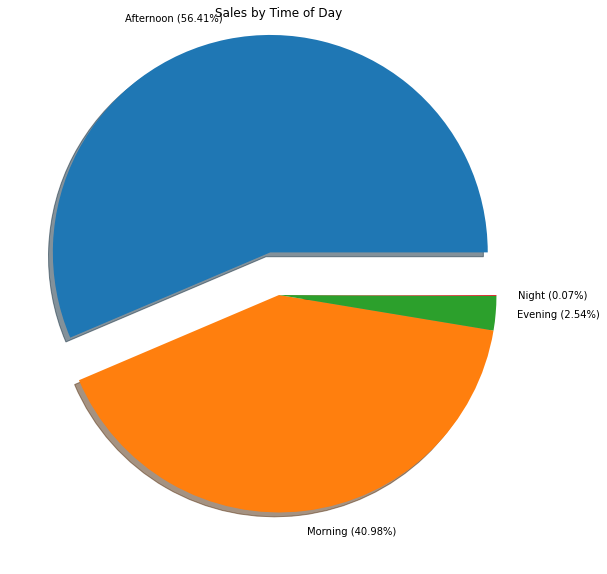

In [ ]:
fig = plt.figure(figsize = (10, 10))

y = np.array([56.41, 40.98, 2.54, 0.07])
mylabels = ["Afternoon (56.41%)", "Morning (40.98%)", "Evening (2.54%)", "Night (0.07%)"]
myexplode = [0.2, 0, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.title('Sales by Time of Day')
plt.show()

In [ ]:
print(df.columns.tolist())

df.Items.value_counts().tolist()

['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType']


[5471,
 3325,
 1435,
 1025,
 856,
 771,
 616,
 590,
 540,
 379,
 374,
 370,
 369,
 369,
 342,
 327,
 318,
 277,
 193,
 185,
 172,
 159,
 152,
 149,
 146,
 136,
 125,
 123,
 107,
 99,
 81,
 77,
 63,
 58,
 54,
 54,
 48,
 47,
 44,
 38,
 38,
 28,
 28,
 21,
 18,
 17,
 16,
 14,
 13,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 10,
 10,
 9,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
df.Items.value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Items, Length: 94, dtype: int64

In [ ]:
df.Items.value_counts().sum()

20507

In [ ]:
print('Coffee Proportion =', 5471/20507)
print('Bread Proportion =', 3325/20507)
print('Tea Proportion =', 1435/20507)
print('Cake Proportion =', 1025/20507)
print('Pastry Proportion =', 856/20507)
print('Sandwich Proportion =', 771/20507)

Coffee Proportion = 0.26678695079728876
Bread Proportion = 0.16213975715609305
Tea Proportion = 0.06997610571999804
Cake Proportion = 0.04998293265714147
Pastry Proportion = 0.04174184424830546
Sandwich Proportion = 0.03759691812551812


[]

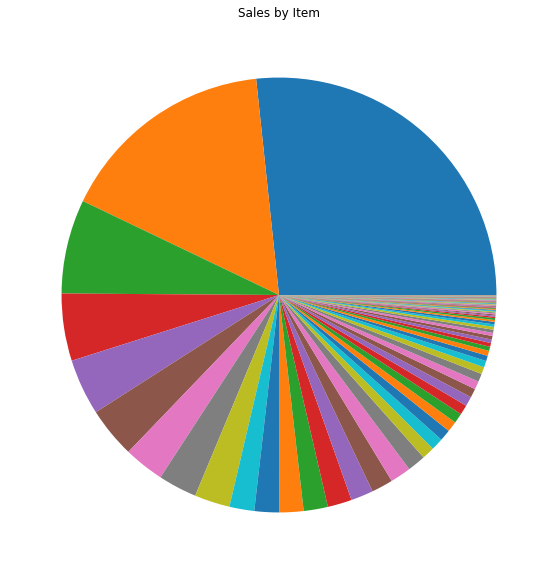

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.pie(df.Items.value_counts())
plt.title('Sales by Item')
plt.plot()

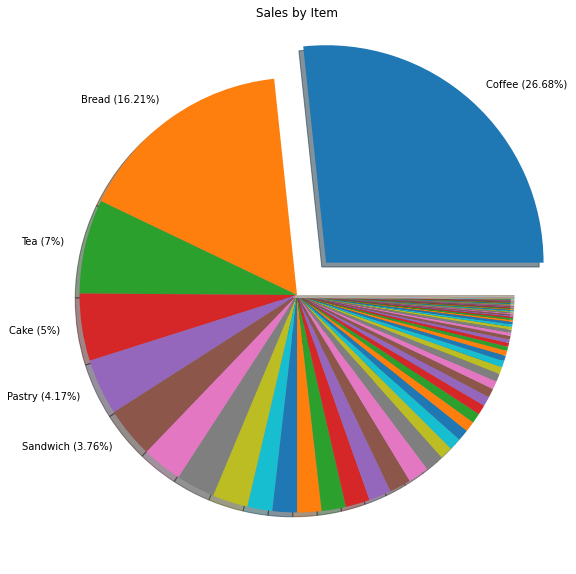

In [ ]:
fig = plt.figure(figsize = (10, 10))
plt.title('Sales by Item')

x = df.Items.value_counts()

# y = np.array([26.68, 16.21, 7, 5, 4.17, 3.76])
mylabels = ["Coffee (26.68%)", "Bread (16.21%)", "Tea (7%)", "Cake (5%)", "Pastry (4.17%)", "Sandwich (3.76%)",'','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','','']
myexplode = [0.2, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(x, labels = mylabels, explode = myexplode, shadow = True)

plt.show()

# EDA Insights: 

- 0. Weekdays are more profitable, with 60% of sales occurring on weekday days. 
- 1. Fewer that 1% of sales occur during the hours designated as night and only 2.5% during the hours designated as evening:
  - As inconvenient as it might be for the patrons (especially dedicated/ loyal night-time customers), NOT OPERATING DURING THESE HOURS would likely increase profits by decreasing the operational costs (employee salary/ wages, utilities, insurance premiums for operating a cash business during periods more prone to (potentially violent) robbery/ theft, *etc.*) to a degree that more than offsets and loss in sales revenue.
- 2. Folks love coffee, bread, tea, pastries, cakes, & sammiches:
  - INCREASING STOCK & VARIETY of such items might increase sales revenue; 
  - as might CREATING PROMOTIONAL OFFERS tailored to the sale of these items; this insight should dovetail w/ those from the Market-Basket Analysis.

In [ ]:
df.Items = df.Items.replace({'Bread': 0, 'Scandinavian': 1, 'Hot chocolate': 2, 'Jam': 3, 'Cookies': 4,
       'Muffin': 5, 'Coffee': 6, 'Pastry': 7, 'Medialuna': 8, 'Tea': 9, 'Tartine': 10,
       'Basket': 11, 'Mineral water': 12, 'Farm House': 13, 'Fudge': 14, 'Juice': 15,
       "Ella's Kitchen Pouches": 16, 'Victorian Sponge': 17, 'Frittata': 18,
       'Hearty & Seasonal': 19, 'Soup': 20, 'Pick and Mix Bowls': 21, 'Smoothies': 22,
       'Cake': 23, 'Mighty Protein': 24, 'Chicken sand': 25, 'Coke': 26,
       'My-5 Fruit Shoot': 27, 'Focaccia': 28, 'Sandwich': 29, 'Alfajores': 30, 'Eggs': 31,
       'Brownie': 32, 'Dulce de Leche': 33, 'Honey': 34, 'The BART': 35, 'Granola': 36,
       'Fairy Doors': 37, 'Empanadas': 38, 'Keeping It Local': 39, 'Art Tray': 40,
       'Bowl Nic Pitt': 41, 'Bread Pudding': 42, 'Adjustment': 43, 'Truffles': 44,
       'Chimichurri Oil': 45, 'Bacon': 46, 'Spread': 47, 'Kids biscuit': 48, 'Siblings': 49,
       'Caramel bites': 50, 'Jammie Dodgers': 51, 'Tiffin': 52, 'Olum & polenta': 53,
       'Polenta': 54, 'The Nomad': 55, 'Hack the stack': 56, 'Bakewell': 57,
       'Lemon and coconut': 58, 'Toast': 59, 'Scone': 60, 'Crepes': 61, 'Vegan mincepie': 62,
       'Bare Popcorn': 63, 'Muesli': 64, 'Crisps': 65, 'Pintxos': 66, 'Gingerbread syrup': 67,
       'Panatone': 68, 'Brioche and salami': 69, 'Afternoon with the baker': 70,
       'Salad': 71, 'Chicken Stew': 72, 'Spanish Brunch': 73,
       'Raspberry shortbread sandwich': 74, 'Extra Salami or Feta': 75,
       'Duck egg': 76, 'Baguette': 77, "Valentine's card": 78, 'Tshirt': 79,
       'Vegan Feast': 80, 'Postcard': 81, 'Nomad bag': 82, 'Chocolates': 83,
       'Coffee granules': 84, 'Drinking chocolate spoons': 85, 'Christmas common': 86,
       'Argentina Night': 87, 'Half slice Monster': 88, 'Gift voucher': 89,
       'Cherry me Dried fruit': 90, 'Mortimer': 91, 'Raw bars': 92, 'Tacos/Fajita': 93})

In [ ]:
df.Items.unique()

In [ ]:
df

In [ ]:
df.Daypart.unique()

In [ ]:
df.Daypart = df['Daypart'].replace({'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})

In [ ]:
df.Daypart.unique()

In [ ]:
df

In [ ]:
df.DayType.unique()

In [ ]:
df.DayType = df.DayType.replace({'Weekend': 0, 'Weekday': 1})

In [ ]:
df.DayType.unique()

In [ ]:
df

In [ ]:
df.DateTime.unique()

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

df['DateTime'] = df['DateTime'].dt.strftime('%Y')

# df['DateTime'] = df['DateTime'].dt.strftime('%Y-%m')

In [ ]:
df.DateTime.unique()

In [ ]:
df

In [ ]:
df.DateTime = pd.to_numeric(df.DateTime)

In [ ]:
df.rename(columns = {'DateTime': 'Year', 'Daypart': 'Morning:0, Afternoon:1, Evening:2, Night:3', 'DayType': 'Weekend:0, Weekday:1'}, inplace = True)

In [ ]:
df

In [ ]:
item_series=pd.DataFrame(pd.Series(items))
item_series=item_series.iloc[:9465,:]
item_series

In [ ]:
item_series.columns=["transactions"]

In [ ]:
df_dummy=item_series["transactions"].str.join(sep='*').str.get_dummies(sep='*')
dummy_copy=df_dummy
dummy_copy.head()

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(df_dummy, min_support=0.01, max_len=4, use_colnames=True)

In [ ]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)

In [ ]:
plt.figure(figsize=(16, 10))
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color =list('rgmyk'))
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=45)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [ ]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending=False).head(10)

In [ ]:
df.Daypart.unique()

In [ ]:

new_df=df[['TransactionNo','Daypart', 'DayType']]
new_df

In [ ]:
new_df['PartType']=new_df['Daypart']+ ' ' + new_df['DayType']
new_df.head()

In [ ]:
days=[]
for i in new_df.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)

#days

In [ ]:
df_drop = new_df.drop_duplicates()
df_drop

In [ ]:
days=[]
for i in df_drop.groupby('TransactionNo')['PartType'].apply(list):
    days.append(i)



In [ ]:
df_drop = df_drop.reset_index(drop=True)

In [ ]:
df_dummy['PartType']=df_drop.PartType
df_dummy.head() 
#Dataframe for dummy variables and Daytype/DayType